In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from peaky_finder import PeakyFinder
from peaky_indexer import PeakyIndexer

In [4]:
path = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/Postdocs/Xuan Cao/Data/LIBS/MW2-112/raw/'
finder = PeakyFinder(path)
indexer = PeakyIndexer(finder)

In [17]:
indexer.peak_interference(638, ground_state=False)

[['Co',
  np.float64(2.0),
  np.float64(637.55477),
  638,
  np.float64(0.9057313863104389),
  np.float64(8.919078092376074)],
 ['Cs',
  np.float64(3.0),
  np.float64(637.4385),
  638,
  np.float64(0.8539163848489482),
  np.float64(8.90036712865647)],
 ['Co',
  np.float64(2.0),
  np.float64(637.35562),
  638,
  np.float64(0.8127205138008069),
  np.float64(8.44715803134222)],
 ['Ca',
  np.float64(3.0),
  np.float64(637.1874),
  638,
  np.float64(0.718575499249628),
  np.float64(8.255272505103306)],
 ['Fe',
  np.float64(2.0),
  np.float64(637.75592),
  638,
  np.float64(0.9706707030309347),
  np.float64(8.204119982655925)],
 ['Ca',
  np.float64(3.0),
  np.float64(638.9311),
  638,
  np.float64(0.648313761481241),
  np.float64(8.176091259055681)],
 ['Si',
  np.float64(2.0),
  np.float64(637.313),
  638,
  np.float64(0.7897929156281152),
  np.float64(8.133538908370218)],
 ['Eu',
  np.float64(1.0),
  np.float64(638.556),
  638,
  np.float64(0.8567852287655893),
  np.float64(8.07918124604762

In [18]:
finder.data.load_data()

In [19]:
testwavelength = finder.data.data[10,0]
testdata = finder.data.data[10, 1]

fourier peaks done
fit peaks done
fit shoulders done
fit all done


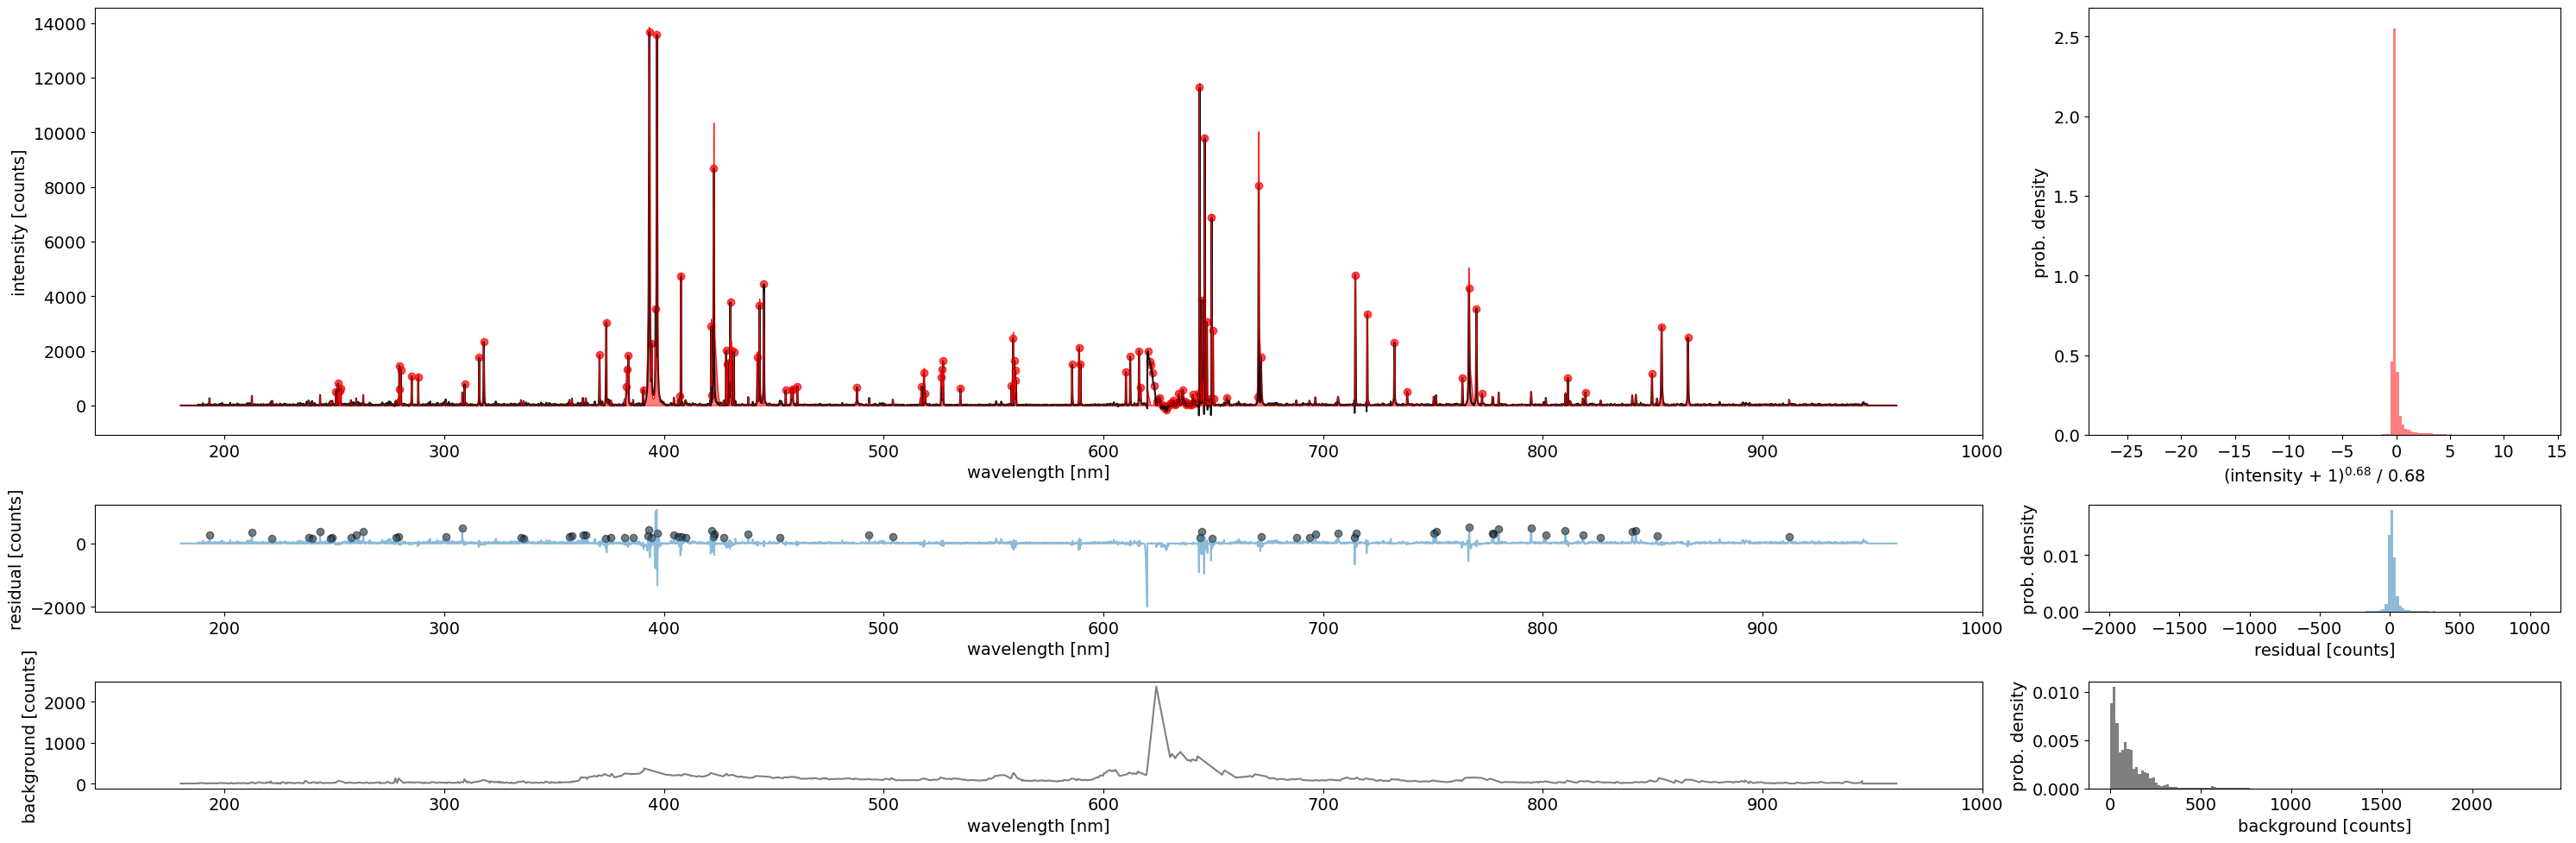

In [20]:
finder_dict = finder.fit_spectrum_data(25, n_sigma=1)

In [21]:
finder_dict['sorted_parameter_array']

array([[7.61397815e+03, 3.93291934e+02, 1.29149251e-01, 1.15929836e-01],
       [7.16360817e+03, 3.96769328e+02, 5.41765972e-02, 1.51946017e-01],
       [4.18224360e+03, 4.23133334e+02, 8.37163934e-01, 0.00000000e+00],
       ...,
       [1.56194723e+00, 6.37513930e+02, 4.91359377e-02, 0.00000000e+00],
       [1.51469067e+00, 2.88923900e+02, 3.07479980e-02, 0.00000000e+00],
       [1.36359970e+00, 2.84697983e+02, 2.87991689e-02, 0.00000000e+00]],
      shape=(281, 4))

In [32]:
test_dict = indexer.peak_match(finder_dict['sorted_parameter_array'], element_list=['Li', 'Mg'])

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
test_dict['Li'].ions[1.0]

{np.int64(3): array([670.961    , 671.0260627]),
 np.int64(6): array([670.961     , 670.65765877]),
 np.int64(143): array([239.5116, 239.8   ]),
 np.int64(148): array([670.961, 671.7  ]),
 np.int64(156): array([242.6163    , 243.43241612]),
 np.int64(166): array([670.961     , 670.19398663]),
 np.int64(185): array([237.4267    , 238.14877815]),
 np.int64(192): array([247.5809    , 248.26007889])}

In [31]:
finder_dict['sorted_parameter_array'][3]

array([3.62290218e+03, 6.71026063e+02, 6.17136270e-01, 0.00000000e+00])

In [37]:
test_dict['Mg'].ions

{np.float64(2.0): {np.int64(63): array([279.6352    , 279.47385674]),
  np.int64(78): array([279.6352    , 280.19298892]),
  np.int64(157): array([279.6352    , 279.72467147]),
  np.int64(204): array([279.6352    , 279.02301169]),
  np.int64(213): array([279.6352    , 280.36666667]),
  np.int64(221): array([279.6352    , 279.90000056]),
  np.int64(251): array([280.3531   , 280.6615508]),
  np.int64(268): array([280.3531    , 281.02997825])},
 np.float64(1.0): {np.int64(66): array([285.29642   , 285.14029478]),
  np.int64(274): array([285.29642   , 285.71474191]),
  np.int64(277): array([285.29642   , 285.94313686]),
  np.int64(280): array([285.29642  , 284.6979834])}}

In [38]:
finder_dict['sorted_parameter_array'][78]

array([2.19533333e+02, 2.80192989e+02, 6.82138962e-02, 0.00000000e+00])

In [24]:
test_locs = np.array(list(test_dict['Li'].ions[1.0].values()))

In [25]:
test_locs

array([[670.961     , 671.0260627 ],
       [670.961     , 670.65765877],
       [239.5116    , 239.8       ],
       [670.961     , 671.7       ],
       [242.6163    , 243.43241612],
       [670.961     , 670.19398663],
       [237.4267    , 238.14877815],
       [247.5809    , 248.26007889]])

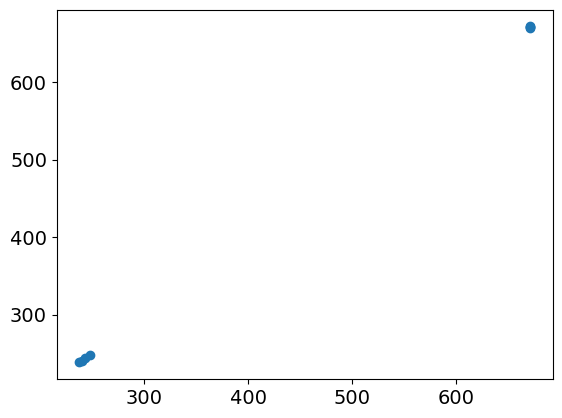

In [46]:
plt.scatter(test_locs[:,0], test_locs[:,1])